In [1]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers import Dense, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.constraints import maxnorm
#from keras.optimizers import SGD
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model

In [2]:
# Instentiate CNN model
model = Sequential()


model.add(Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(256, kernel_constraint = maxnorm(3), activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128, kernel_constraint = maxnorm(3), activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Output 
model.add(Dense(10, activation = 'softmax'))

In [3]:
# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [5]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = model.layers #Conv layers at 0, 3, 7, 11
print(layer)

[<keras.layers.convolutional.Conv2D object at 0x7fb9cf6bcd90>, <keras.layers.core.dropout.Dropout object at 0x7fb94f04bb90>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb94e48df50>, <keras.layers.convolutional.Conv2D object at 0x7fb94a3243d0>, <keras.layers.pooling.MaxPooling2D object at 0x7fb94a33f890>, <keras.layers.core.dropout.Dropout object at 0x7fb94a2fba90>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb94a324d90>, <keras.layers.convolutional.Conv2D object at 0x7fb94a2d1510>, <keras.layers.pooling.MaxPooling2D object at 0x7fb94a2b9e90>, <keras.layers.core.dropout.Dropout object at 0x7fb952a73450>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb94a2ef910>, <keras.layers.convolutional.Conv2D object at 0x7fb94a2e5450>, <keras.layers.pooling.MaxPooling2D object at 0x7fb94a28bfd0>, <keras.layers.core.dropout.Dropout object at 0x7fb94a28fdd0>, <keras.layers.normalization.batch_n

In [6]:
print("Total layers: ", len(model.layers))

print("Convolutional layers: Name, shape")
for i,layer in enumerate(model.layers):
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print("Index: ", i, "| Name of the layer: ", layer.name, "| Shape: ", filters.shape)

Total layers:  24
Convolutional layers: Name, shape
Index:  0 | Name of the layer:  conv2d | Shape:  (3, 3, 3, 32)
Index:  3 | Name of the layer:  conv2d_1 | Shape:  (3, 3, 32, 64)
Index:  7 | Name of the layer:  conv2d_2 | Shape:  (3, 3, 64, 64)
Index:  11 | Name of the layer:  conv2d_3 | Shape:  (3, 3, 64, 128)


In [7]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.

filters, biases = model.layers[0].get_weights()
#print(layer[0].name, filters.shape)

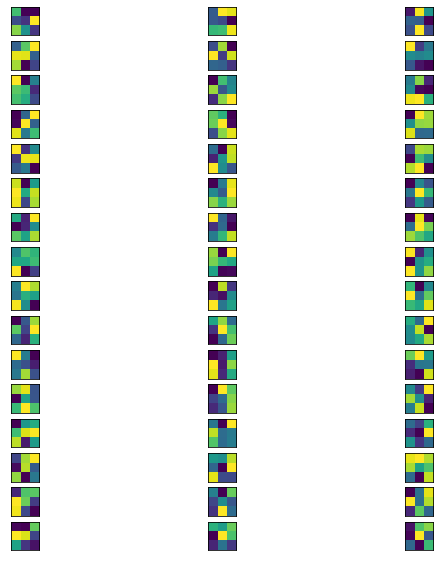

In [8]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plot first few filters
n_filters, ix = 16, 1
plt.figure(figsize = (10,10))
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j])
        ix += 1
# show the figure
plt.show()

In [9]:
from google.colab import files
uploaded = files.upload()

Saving Romeo1.jpg to Romeo1 (3).jpg


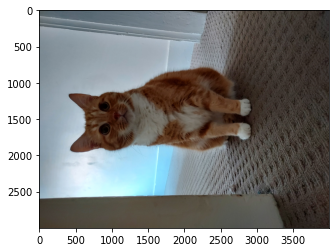

In [10]:
# Show the image
romeo_image = plt.imread('Romeo1.jpg')
romeo_img = plt.imshow(romeo_image)

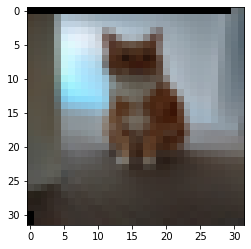

In [11]:
# Resize the image
from skimage.transform import resize
import scipy
resized_romeo = resize(romeo_image, (32,32,3))
r_resized_romeo = scipy.ndimage.rotate(resized_romeo, -90)
romeo_img = plt.imshow(r_resized_romeo)

In [12]:
from keras.preprocessing.image import img_to_array
# convert the image to an array
img = img_to_array(r_resized_romeo)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

In [13]:
# redefine model to output right after the last hidden layer
layer_idx = 0
submodel = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
# get feature map for first hidden layer
feature_maps = submodel.predict(img)

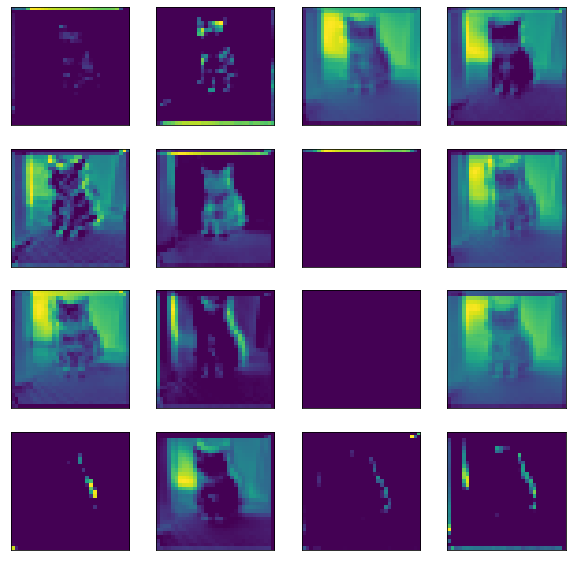

In [14]:
# plot all 64 maps in an 8x8 squares
square = 4
ix = 1

plt.figure(figsize = (10,10))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
# show the figure
plt.show()

In [15]:


# redefine model to output right after the last hidden layer
layer_idx = 7
submodel = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
# get feature map for third hidden layer
feature_maps = submodel.predict(img)


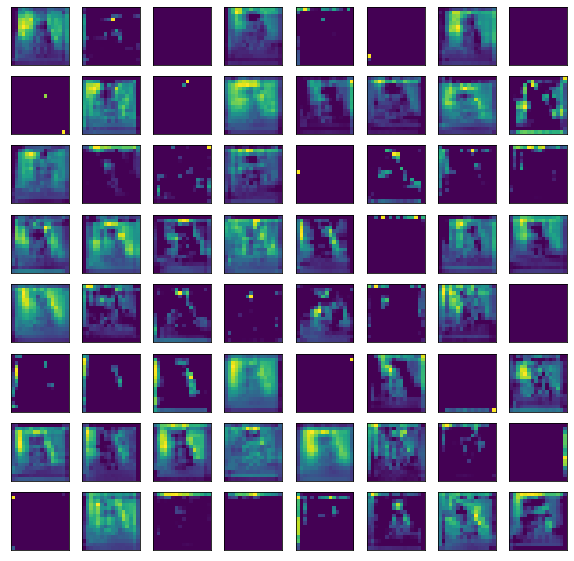

In [16]:
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1

plt.figure(figsize=(10,10))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
# show the figure
plt.show()

In [17]:
# redefine model to output right after the last hidden layer
layer_idx = 11
submodel = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
# get feature map for last hidden layer
feature_maps = submodel.predict(img)

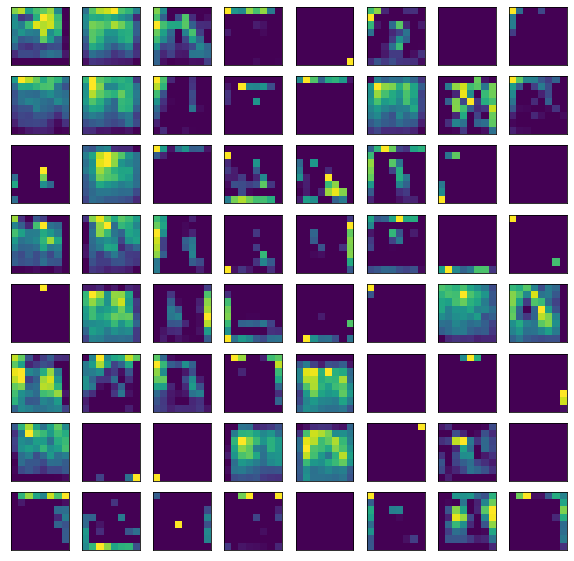

In [18]:
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1

plt.figure(figsize=(10,10))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
# show the figure
plt.show()